In [174]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [176]:
df = pd.read_csv("Spotify_Dataset_V3.csv", sep=';')

In [178]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# extract the day, month, and year components
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

#df2 = df2.drop(['Date'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651936 entries, 0 to 651935
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rank                              651936 non-null  int64         
 1   Title                             651936 non-null  object        
 2   Artists                           651936 non-null  object        
 3   Date                              651936 non-null  datetime64[ns]
 4   Danceability                      651936 non-null  float64       
 5   Energy                            651936 non-null  float64       
 6   Loudness                          651936 non-null  float64       
 7   Speechiness                       651936 non-null  float64       
 8   Acousticness                      651936 non-null  float64       
 9   Instrumentalness                  651936 non-null  float64       
 10  Valence                         

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_11465/2656443454.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [180]:
# df.groupby('Artist (Ind.)').nunique().sort_values(by='Rank', ascending=False)
df.groupby('Artist (Ind.)').size().sort_values(ascending=False)

Artist (Ind.)
Bad Bunny         16624
Ed Sheeran        12837
Post Malone       11505
J Balvin          10659
The Weeknd        10050
                  ...  
Tayrone               1
Baby Goth             1
Taylor Bennett        1
Tarkan                1
J-AX                  1
Length: 2208, dtype: int64

In [182]:
artist_sentences = df['Artist (Ind.)'].tolist()

#artist_sentences

In [184]:
from gensim.models import Word2Vec

In [186]:
# Step 2: Train a Word2Vec model
# Parameters can be adjusted based on dataset size and quality
model = Word2Vec(sentences=artist_sentences, vector_size=1, window=3, min_count=1, workers=4)


In [188]:

# Step 3: Generate Artist Vectors
# Create a dictionary for quick lookup
artist_vectors = {artist: model.wv[artist] for artist in model.wv.index_to_key}



In [190]:
# Step 4: Apply Artist Vectors to the Dataset
# Example: Averaging vectors for multiple artists in a song
def get_average_vector(artists, model):
    vectors = [model.wv[artist] for artist in artists if artist in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size



In [192]:
# Add new column with averaged artist vectors
df['Artist_Vector'] = df['Artists'].apply(lambda artists: get_average_vector(artists, model))



In [194]:
df['Artist_Vector']

0         [-0.35437152]
1         [-0.35437152]
2         [-0.35403332]
3          [-0.3525755]
4          [-0.3525755]
              ...      
651931    [-0.35985932]
651932    [-0.35543168]
651933     [-0.3524803]
651934    [-0.35821342]
651935    [-0.35821342]
Name: Artist_Vector, Length: 651936, dtype: object

In [196]:
# Show final DataFrame
df.head(2)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,day,month,year,Artist_Vector
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,29,5,2023,[-0.35437152]
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,29,5,2023,[-0.35437152]


In [198]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert 'Artist_Vector' column to a numpy array
artist_vectors = np.array(df['Artist_Vector'].tolist())  # Shape: (n_samples, vector_size)

# Standardize the vectors
scaler = StandardScaler()
standardized_artist_vectors = scaler.fit_transform(artist_vectors)


In [200]:

standardized_artist_vectors

array([[0.2818994 ],
       [0.2818994 ],
       [0.30643636],
       ...,
       [0.4191123 ],
       [0.00315997],
       [0.00315997]], dtype=float32)

In [202]:
# Replace the original 'Artist_Vector' with standardized vectors
df['Standardized_Artist_Vector'] = standardized_artist_vectors

# View the updated DataFrame
# print(df[['Artists', 'Standardized_Artist_Vector']])
df.head(2)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,day,month,year,Artist_Vector,Standardized_Artist_Vector
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,29,5,2023,[-0.35437152],0.281899
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,29,5,2023,[-0.35437152],0.281899


In [204]:
title_sentences = df['Title'].tolist()
model = Word2Vec(sentences=title_sentences, vector_size=1, window=3, min_count=1, workers=4)
title_vectors = {title: model.wv[title] for title in model.wv.index_to_key}

def get_average_vector(titles, model):
    vectors = [model.wv[title] for title in titles if title in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size

df['Title_Vector'] = df['Title'].apply(lambda titles: get_average_vector(titles, model))

title_vectors = np.array(df['Title_Vector'].tolist())  # Shape: (n_samples, vector_size)

# Standardize the vectors
scaler = StandardScaler()
standardized_title_vectors = scaler.fit_transform(title_vectors)
df['Standardized_Title_Vector'] = standardized_title_vectors

In [205]:
nationality_sentences = df['Nationality'].tolist()
model = Word2Vec(sentences=nationality_sentences, vector_size=1, window=3, min_count=1, workers=4)
nationality_vectors = {nationality: model.wv[nationality] for nationality in model.wv.index_to_key}

def get_average_vector(nationalities, model):
    vectors = [model.wv[nationality] for nationality in nationalities if nationality in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size

df['Nationality_Vector'] = df['Nationality'].apply(lambda nationalities: get_average_vector(nationalities, model))

nationality_vectors = np.array(df['Nationality_Vector'].tolist())  # Shape: (n_samples, vector_size)

# Standardize the vectors
scaler = StandardScaler()
standardized_nationality_vectors = scaler.fit_transform(nationality_vectors)
df['Standardized_Nationality_Vector'] = standardized_nationality_vectors

In [206]:
continent_sentences = df['Continent'].tolist()
model = Word2Vec(sentences=continent_sentences, vector_size=1, window=3, min_count=1, workers=4)
continent_vectors = {continent: model.wv[continent] for continent in model.wv.index_to_key}

def get_average_vector(continents, model):
    vectors = [model.wv[continent] for continent in continents if continent in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * model.vector_size

df['Continent_Vector'] = df['Continent'].apply(lambda continents: get_average_vector(continents, model))

continent_vectors = np.array(df['Continent_Vector'].tolist())  # Shape: (n_samples, vector_size)

# Standardize the vectors
scaler = StandardScaler()
standardized_continent_vectors = scaler.fit_transform(continent_vectors)
df['Standardized_Continent_Vector'] = standardized_continent_vectors

In [207]:
df.head(2)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,month,year,Artist_Vector,Standardized_Artist_Vector,Title_Vector,Standardized_Title_Vector,Nationality_Vector,Standardized_Nationality_Vector,Continent_Vector,Standardized_Continent_Vector
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,5,2023,[-0.35437152],0.281899,[0.48999438],0.163093,[0.38655916],1.597746,[0.37915957],0.101501
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.0,...,5,2023,[-0.35437152],0.281899,[0.48999438],0.163093,[0.38655916],1.597746,[0.37915957],0.101501


In [208]:
df.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'day', 'month',
       'year', 'Artist_Vector', 'Standardized_Artist_Vector', 'Title_Vector',
       'Standardized_Title_Vector', 'Nationality_Vector',
       'Standardized_Nationality_Vector', 'Continent_Vector',
       'Standardized_Continent_Vector'],
      dtype='object')

In [209]:
danceability = scaler.fit_transform(df[['Danceability']])
df['Danceability'] = danceability

In [210]:
energy = scaler.fit_transform(df[['Energy']])
df['Energy'] = energy

In [211]:
loudness = scaler.fit_transform(df[['Loudness']])
df['Loudness'] = loudness

In [212]:
speechiness = scaler.fit_transform(df[['Speechiness']])
df['Speechiness'] = speechiness

In [222]:
acousticness = scaler.fit_transform(df[['Acousticness']])
df['Acousticness'] = acousticness

In [224]:
instrumentalness = scaler.fit_transform(df[['Instrumentalness']])
df['Instrumentalness'] = instrumentalness

In [226]:
valence = scaler.fit_transform(df[['Valence']])
df['Valence'] = valence

In [228]:
points = scaler.fit_transform(df[['Points (Total)']])
df['Points (Total)'] = points

In [230]:
df['Day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
df['Month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [232]:
df2 = df.drop_duplicates(subset='Title', keep='first')  # Drop duplicates based on 'Song', keeping the highest rank
print(df2.shape, df.shape)

(7457, 35) (651936, 35)


In [234]:
dftest = df2.drop(['Title','Artists','Artist (Ind.)', 'Date','# of Artist','# of Nationality'], axis=1)

In [236]:
dftest = dftest.drop(['Points (Ind for each Artist/Nat)','id','Song URL', 'day','month'], axis=1)

In [238]:
dftest = dftest.drop(['Nationality','Continent', 'Artist_Vector','Title_Vector','Nationality_Vector','Continent_Vector'], axis=1)

In [240]:
# Group the data by year and calculate mean energy and danceability

grouped_df_by_year = df.groupby('year')[['Energy', 'Danceability']].mean()

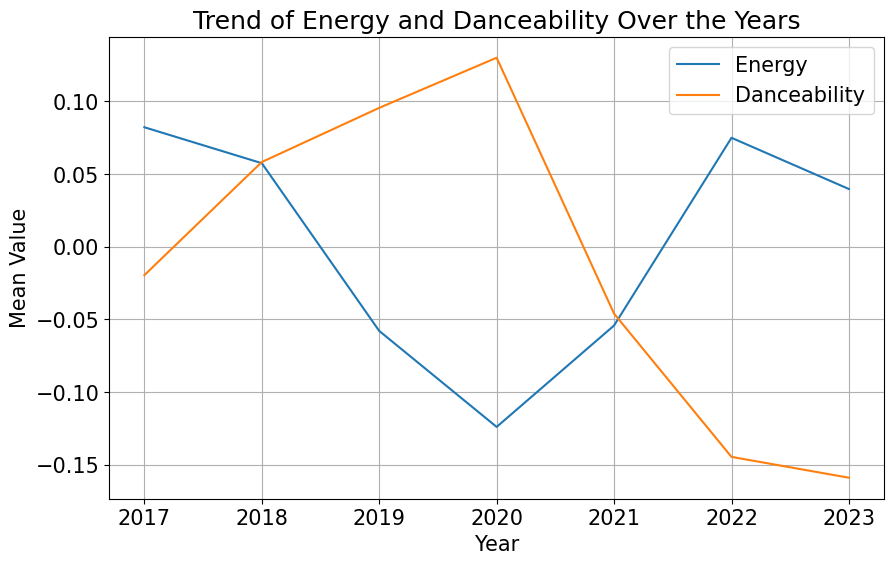

In [242]:


import matplotlib.pyplot as plt

# Plot the trend of energy and danceability over the years
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_by_year.index, grouped_df_by_year['Energy'], label='Energy')
plt.plot(grouped_df_by_year.index, grouped_df_by_year['Danceability'], label='Danceability')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Trend of Energy and Danceability Over the Years')
plt.legend()
plt.grid(True)
plt.show()

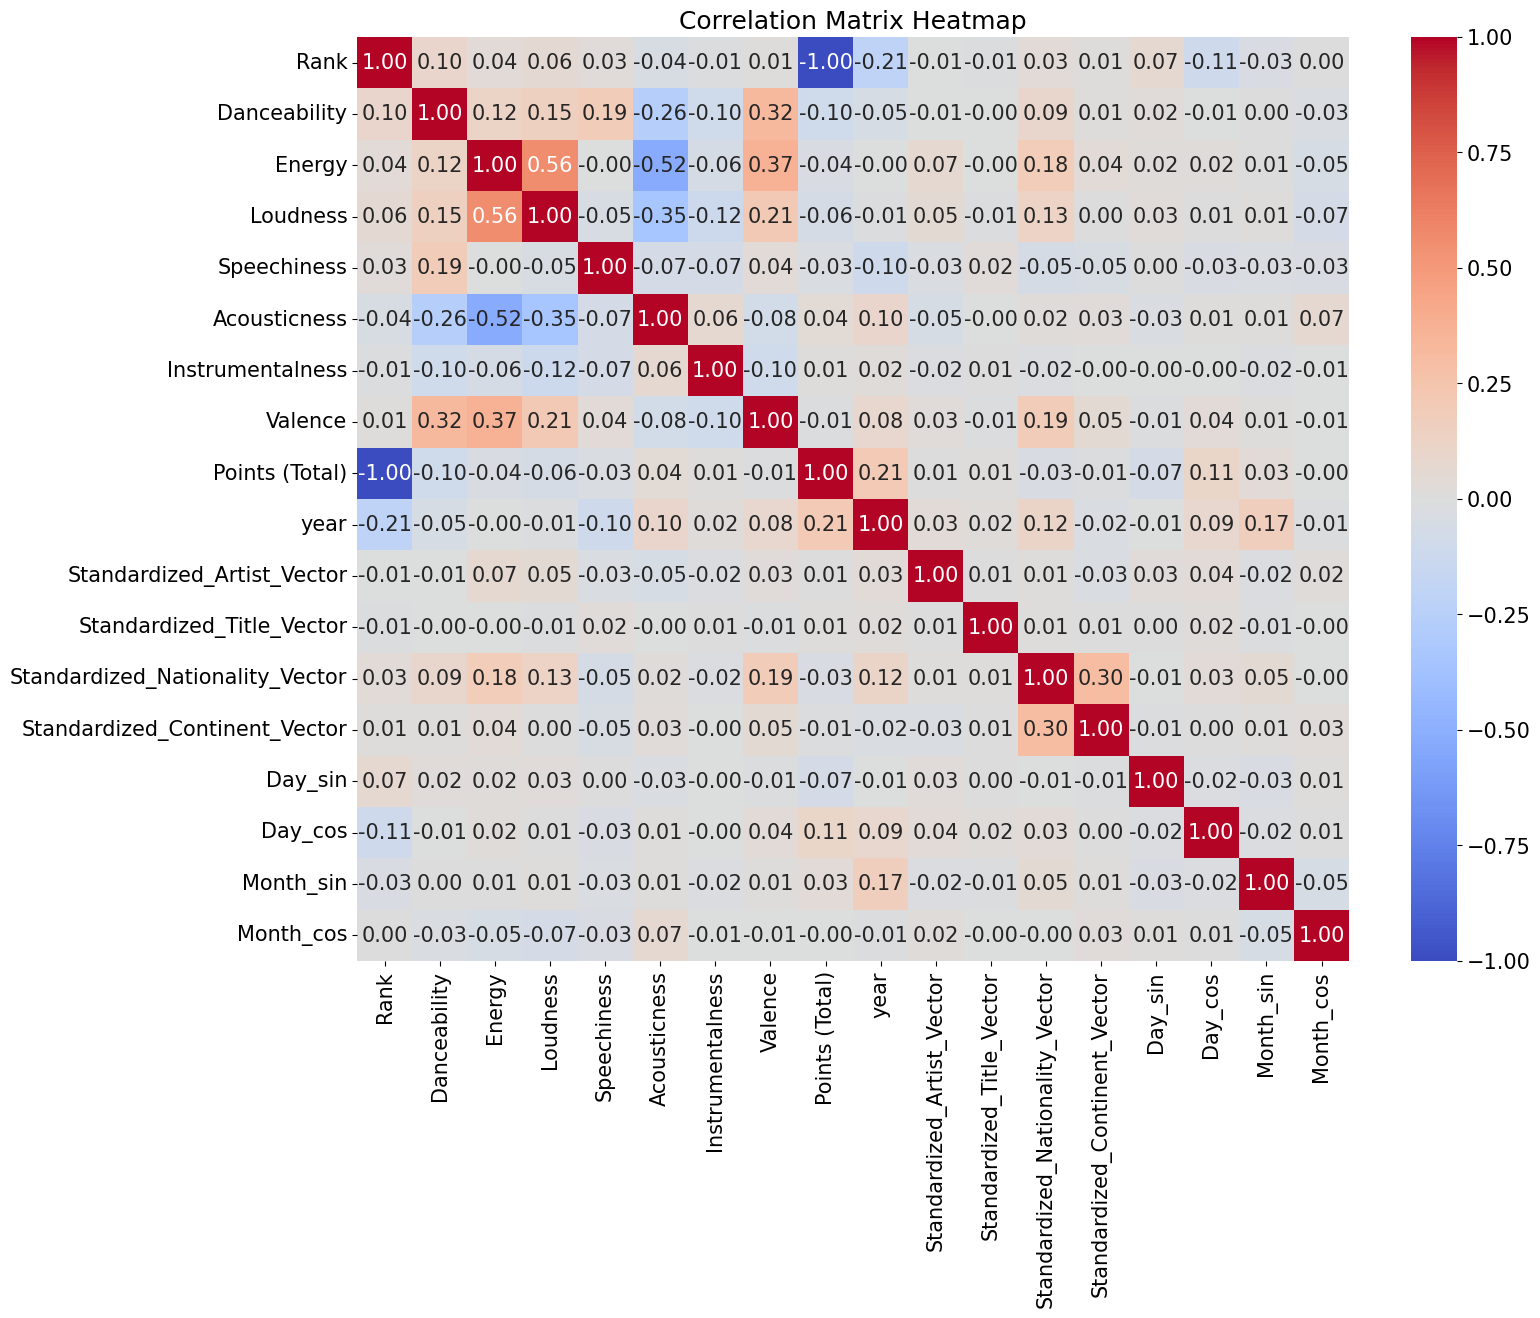

In [244]:

plt.figure(figsize=(16, 12))
sns.heatmap(dftest.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [245]:
pca = PCA(n_components=6)  # Choose the number of components based on your needs
pca_transformed = pca.fit_transform(dftest.drop(['Rank', 'Day_sin','Day_cos','Month_sin','Month_cos','year','Points (Total)'], axis=1))


In [248]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

pca_df.shape


(7457, 6)

In [250]:
# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_


In [252]:
print("Explained variance by each component:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.2%}")


Explained variance by each component:
PC1: 20.71%
PC2: 15.58%
PC3: 12.00%
PC4: 10.34%
PC5: 8.14%
PC6: 7.49%


In [254]:
print(pca_df.index)

RangeIndex(start=0, stop=7457, step=1)


In [256]:
print(dftest.index)

Index([     0,      2,      3,      5,      6,      8,      9,     10,     11,
           12,
       ...
       651547, 651626, 651862, 651887, 651898, 651918, 651919, 651921, 651926,
       651934],
      dtype='int64', length=7457)


In [258]:
pca_df = pca_df.reset_index(drop=True)
dftest = dftest.reset_index(drop=True)

In [260]:
df_export = pd.concat([pca_df, dftest['Rank']], axis=1)

From this point until specified below, contains code that was used for our understanding and reference. It does not deem fit to be included in the results.  

In [263]:
df_export.to_csv('dfexport_14pca.csv')

In [265]:
print(pca.components_[0])

[-0.28980544 -0.44526503 -0.4367601  -0.10447462  0.3546146   0.52553546
 -0.28836708 -0.05334888  0.00494615 -0.16368529 -0.03632457]


In [267]:
(dftest.drop(['Rank'], axis=1)).columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Valence', 'Points (Total)', 'year',
       'Standardized_Artist_Vector', 'Standardized_Title_Vector',
       'Standardized_Nationality_Vector', 'Standardized_Continent_Vector',
       'Day_sin', 'Day_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

In [269]:
ind_contr = np.zeros(11)#17
ind_contr
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [271]:
for j in range(0,11):                #change as per change in dataset
    for i in range(0,6):
        ind_contr[j] += abs(pca.components_[i][j])

In [273]:
ind_contr

array([1.79996175, 1.25677963, 1.26670365, 1.81307367, 1.12747332,
       1.62135945, 1.18684288, 0.47311696, 1.33864339, 1.5681752 ,
       0.96170674])

In [275]:
cols_df = (dftest.drop(['Rank', 'Day_sin','Day_cos','Month_sin','Month_cos','year', 'Points (Total)'], axis=1)).columns

In [277]:
pd.DataFrame(np.column_stack([cols_df.to_numpy(), ind_contr])).sort_values(by=1, ascending=False)

,0,1
3,Speechiness,1.813074
0,Danceability,1.799962
5,Instrumentalness,1.621359
9,Standardized_Nationality_Vector,1.568175
8,Standardized_Title_Vector,1.338643
2,Loudness,1.266704
1,Energy,1.25678
6,Valence,1.186843
4,Acousticness,1.127473
10,Standardized_Continent_Vector,0.961707


In [279]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object')

The section of code that was used for our understanding and reference ends here. Code written below is usuful for our results. 

In [282]:
data = df_export

In [284]:
def rank_category(rank):
    if rank <= 20:     # Top 50
        return 1
    elif rank >20 and rank <=50:
        return 2
    elif rank >50 and rank <=100:
        return 3
    elif rank >100 and rank <=200:
        return 4
    else:
        return 0  


In [286]:
data.shape

(7457, 7)

In [288]:
data.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Rank'], dtype='object')

In [290]:
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Rank
0,-0.807490,0.475801,-1.565684,1.557210,0.017960,0.393603,1
1,5.281012,9.993025,1.148892,0.233542,0.145901,-0.573028,2
2,-0.637337,-0.433595,1.635823,1.900799,-0.136270,-0.611703,3
3,0.195171,-0.391087,-0.492428,0.687762,-0.760192,1.668654,4
4,-0.711997,0.547470,-1.467784,0.869853,4.731567,0.685236,5


In [292]:
data = data.sort_values(by='Rank', ascending=True)  # Assuming ascending order means highest rank is the first row
print(data)

           PC1       PC2       PC3       PC4       PC5       PC6  Rank
0    -0.807490  0.475801 -1.565684  1.557210  0.017960  0.393603     1
1     5.281012  9.993025  1.148892  0.233542  0.145901 -0.573028     2
6573 -0.296624  0.050218 -1.005511  0.550956 -0.650302  0.376783     2
7095 -0.764818  0.344689 -0.760101 -1.121989 -0.169758  0.663369     2
2    -0.637337 -0.433595  1.635823  1.900799 -0.136270 -0.611703     3
...        ...       ...       ...       ...       ...       ...   ...
5469 -0.679189  0.414429 -0.612961 -1.968732  0.247985 -0.367993   200
5488  4.542951 -3.003786 -0.820225  1.605880 -0.591833  0.712581   200
7078 -1.285263  0.752912 -0.434135 -1.845130 -0.146990 -0.420877   200
5391 -1.515765  0.103874  2.167407  2.453655  0.206690 -2.014012   200
7456 -1.431546  0.306267  1.464042 -0.607033 -0.003473  0.104623   200

[7457 rows x 7 columns]


In [294]:
#Apply the ranking category function to the data
data['Rank_Category'] = data['Rank'].apply(rank_category)

In [296]:
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Rank,Rank_Category
0,-0.807490,0.475801,-1.565684,1.557210,0.017960,0.393603,1,1
1,5.281012,9.993025,1.148892,0.233542,0.145901,-0.573028,2,1
6573,-0.296624,0.050218,-1.005511,0.550956,-0.650302,0.376783,2,1
7095,-0.764818,0.344689,-0.760101,-1.121989,-0.169758,0.663369,2,1
2,-0.637337,-0.433595,1.635823,1.900799,-0.136270,-0.611703,3,1


In [298]:
x = data.drop(columns=['Rank', 'Rank_Category'])  # Drop rank, date, and target columns
y = data['Rank_Category']

print(x)
# Handle missing values if any
x = x.fillna(x.median())  # For simplicity, fill numeric features with median values

           PC1       PC2       PC3       PC4       PC5       PC6
0    -0.807490  0.475801 -1.565684  1.557210  0.017960  0.393603
1     5.281012  9.993025  1.148892  0.233542  0.145901 -0.573028
6573 -0.296624  0.050218 -1.005511  0.550956 -0.650302  0.376783
7095 -0.764818  0.344689 -0.760101 -1.121989 -0.169758  0.663369
2    -0.637337 -0.433595  1.635823  1.900799 -0.136270 -0.611703
...        ...       ...       ...       ...       ...       ...
5469 -0.679189  0.414429 -0.612961 -1.968732  0.247985 -0.367993
5488  4.542951 -3.003786 -0.820225  1.605880 -0.591833  0.712581
7078 -1.285263  0.752912 -0.434135 -1.845130 -0.146990 -0.420877
5391 -1.515765  0.103874  2.167407  2.453655  0.206690 -2.014012
7456 -1.431546  0.306267  1.464042 -0.607033 -0.003473  0.104623

[7457 rows x 6 columns]


In [300]:
x.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.807490,0.475801,-1.565684,1.557210,0.017960,0.393603
1,5.281012,9.993025,1.148892,0.233542,0.145901,-0.573028
6573,-0.296624,0.050218,-1.005511,0.550956,-0.650302,0.376783
7095,-0.764818,0.344689,-0.760101,-1.121989,-0.169758,0.663369
2,-0.637337,-0.433595,1.635823,1.900799,-0.136270,-0.611703


In [302]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [304]:
# Convert categorical columns, if any
categorical_cols = x.select_dtypes(include=['object']).columns
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and tune the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=0)

In [306]:
# Perform cross-validation to assess generalization better
cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.94635373 0.94635373 0.94635373 0.94719195 0.94719195]
Mean Cross-Validation Score: 0.9466890192791283


In [307]:
try:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Classification Accuracy on Test Set:", accuracy_score(y_test, y_pred))
except Exception as e:
    print("An error occurred:", e)

Classification Accuracy on Test Set: 0.9470509383378016


In [310]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=0),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
    'Support Vector Machine': SVC(kernel='linear', random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=0)
}

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

model_scores = {"Model": [], "Accuracy": [], "F1-Score": []}
# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(x_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(x_test)
        
        # Compute metrics
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
        
        # Print the classification results
        print(f"--- {model_name} ---")
        print("Classification Accuracy on Test Set:", accuracy_score(y_test, y_pred))
        
        # Add zero_division=1 to avoid ill-defined precision/recall for labels with no predicted samples
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
        print("="*50)

        model_scores["Model"].append(model_name)
        model_scores["Accuracy"].append(acc)
        model_scores["F1-Score"].append(f1)
    
    except Exception as e:
        print(f"An error occurred with {model_name}: {e}")


--- Random Forest ---
Classification Accuracy on Test Set: 0.9470509383378016

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.00      0.00         7
           2       1.00      0.00      0.00        12
           3       1.00      0.00      0.00        60
           4       0.95      1.00      0.97      1413

    accuracy                           0.95      1492
   macro avg       0.99      0.25      0.24      1492
weighted avg       0.95      0.95      0.92      1492

--- Logistic Regression ---
Classification Accuracy on Test Set: 0.9470509383378016

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.00      0.00         7
           2       1.00      0.00      0.00        12
           3       1.00      0.00      0.00        60
           4       0.95      1.00      0.97      1413

    accuracy                           0.95      1492
   macro avg       0.99    

In [312]:
Model = ['Random Forest','Logistic Regression','Support Vector Machine','K-Nearest Neighbors','Gradient Boosting','Decision Tree']

In [314]:
f1score = [[0.74,0.32,0.68,0.94,0.8143],[0.94,0.89,0.95,0.99,0.9658],[0.94,0.89,0.95,0.99,0.9671],[0.59,0.33,0.56,0.93,0.7561],[0.74,0.52,0.78,0.96,0.8579],[0.59,0.45,0.63,0.92,0.7747]]

In [316]:
Accuracy = [[],[],[],[],[],[]]

/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_11465/1031835788.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)
/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_11465/1031835788.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)
/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_11465/1031835788.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)
/var/folders/z6/32s2tx951_3735nb73ddq__80000gn/T/ipykernel_11465/1031835788.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, f

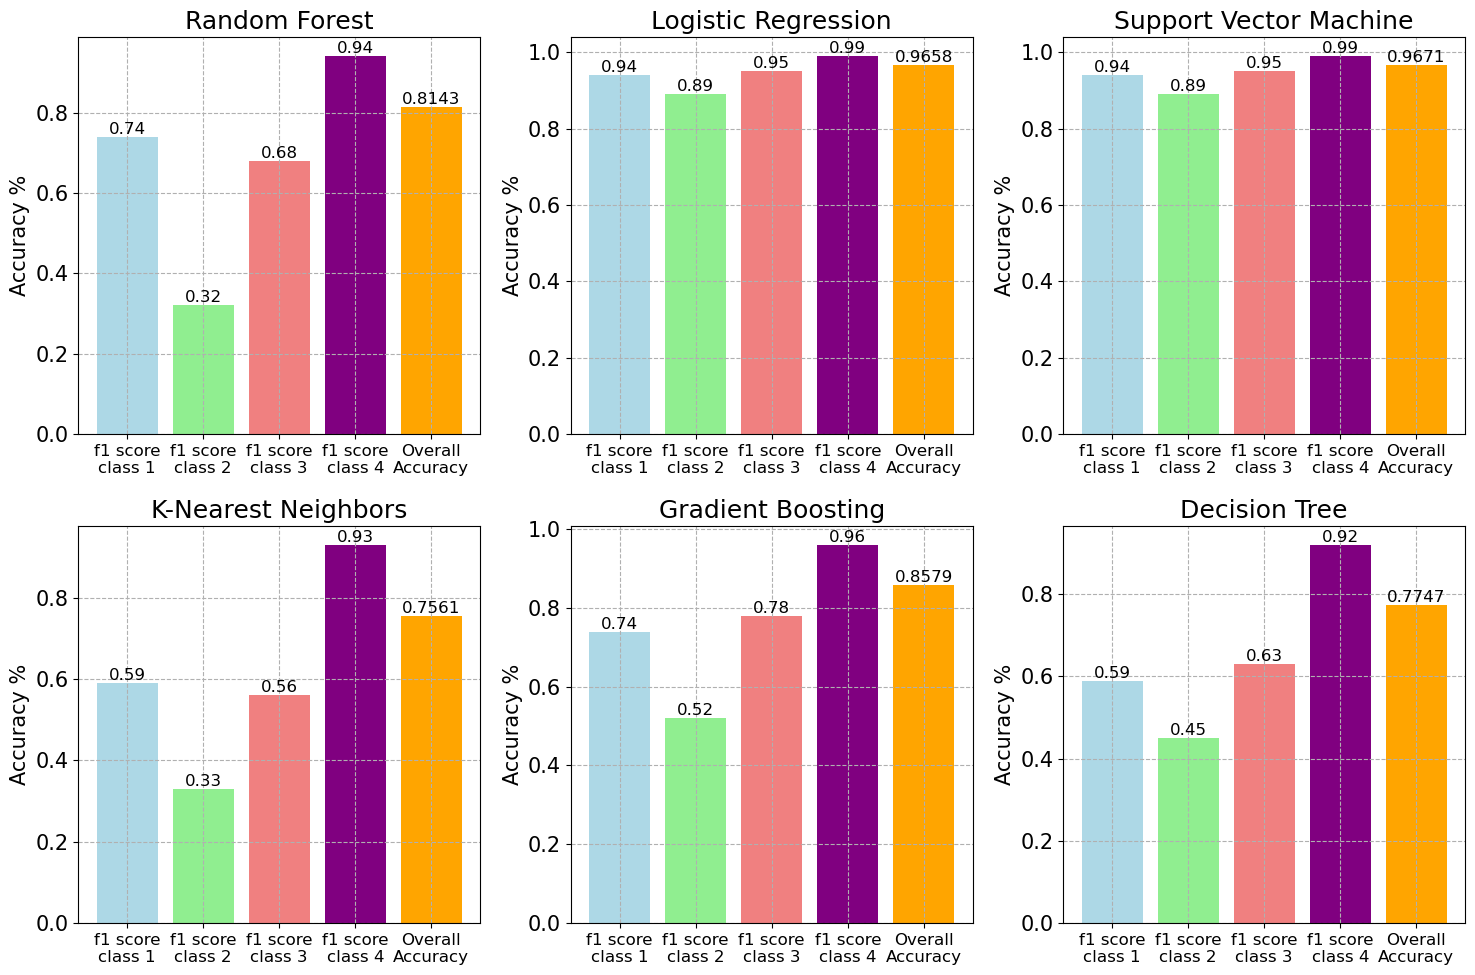

<Figure size 640x480 with 0 Axes>

In [318]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for bar plots (You can replace this with your actual data)
labels = ['f1 score\nclass 1','f1 score\nclass 2','f1 score\nclass 3','f1 score\nclass 4','Overall\nAccuracy']

colors = [
    ['lightblue', 'lightgreen', 'lightcoral', 'purple', 'orange', 'skyblue'],
    ['lightblue', 'lightgreen', 'lightcoral', 'purple', 'orange', 'skyblue']
]

# Create 2x3 grid for subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
plt.rcParams.update({'font.size': 15})

for i in range(2):
    for j in range(3):
        ax = axs[i][j]
        ax.bar(labels, f1score[3*i+j], color=colors[i])
        ax.set_title(Model[3*i+j])
        #ax.set_xticks(np.arange(len(data[i*3+j])))
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylabel('Accuracy %')
        ax.grid(True, linestyle='--')

        # Add value labels to bars
        for k, v in enumerate(f1score[3*i+j]):
            ax.text(k, v, str(v), ha='center', va='bottom', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

